# MALIGNANT COMMENTS CLASSIFICATION

### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

### Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 

The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   
The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available. 

You need to build a model that can differentiate between comments and its categories.  
 


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score,classification_report, confusion_matrix, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier

import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer

import pickle
import warnings
warnings.filterwarnings('ignore')

# Importing the DATASET

In [2]:
comments_train=pd.read_csv(r"C:\Users\Archana\Desktop\Malignant Comments Classifier Project\train.csv")

In [3]:
comments_test=pd.read_csv(r"C:\Users\Archana\Desktop\Malignant Comments Classifier Project\test.csv")

# EDA

## Checking Top 5 rows of dataset

In [4]:
comments_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
comments_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


## Checking Total Numbers of Rows and Column

In [6]:
comments_train.shape

(159571, 8)

In [7]:
comments_test.shape

(153164, 2)

## Checking All Column Names

In [8]:
comments_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [9]:
comments_test.columns

Index(['id', 'comment_text'], dtype='object')

## Checking Data Type of All Data

In [10]:
comments_train.dtypes

id                  object
comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [11]:
comments_test.dtypes

id              object
comment_text    object
dtype: object

## Checking for Null Values

In [12]:
comments_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [13]:
comments_test.isnull().sum()

id              0
comment_text    0
dtype: int64

## Checking for Null Values through heatmap

<AxesSubplot:>

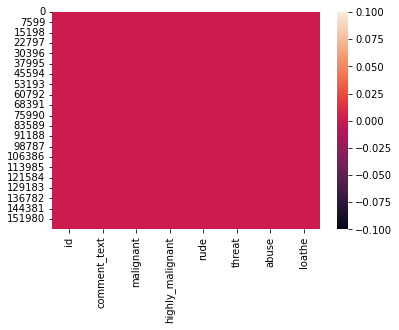

In [14]:
sns.heatmap(comments_train.isnull())

<AxesSubplot:>

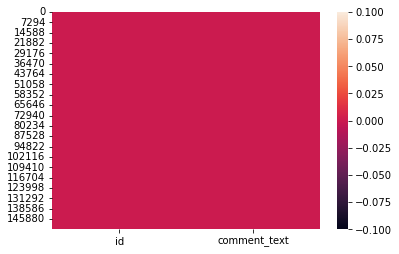

In [15]:
sns.heatmap(comments_test.isnull())

##### We can see there is no Null Value present in our dataset neither in comments_train dataset nor in comments_test dataset

## Information about Data (Memory Used and Data Types)

In [16]:
comments_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [17]:
comments_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


## Checking for ? values if present in our dataset or not

In [18]:
(comments_train=='?').sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [19]:
(comments_test=='?').sum()

id              0
comment_text    0
dtype: int64

##### We can see there is no "?" Value present in our dataset.

## Checking total count of unique elements of each columns

In [20]:
comments_train.nunique()

id                  159571
comment_text        159571
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [21]:
comments_test.nunique()

id              153164
comment_text    153164
dtype: int64

### Checking unique values present in the columns :
#### "malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"

In [22]:
comment_columns= ["malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"]
for i in comments_train[comment_columns]:
    print(i, comments_train[i].unique(),"\n")

malignant [0 1] 

highly_malignant [0 1] 

rude [0 1] 

threat [0 1] 

abuse [0 1] 

loathe [0 1] 



# Descriptive Statistics

In [23]:
# Description of comments_train Dataset : works only on continuous column 
comments_train.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking Description through heatmap

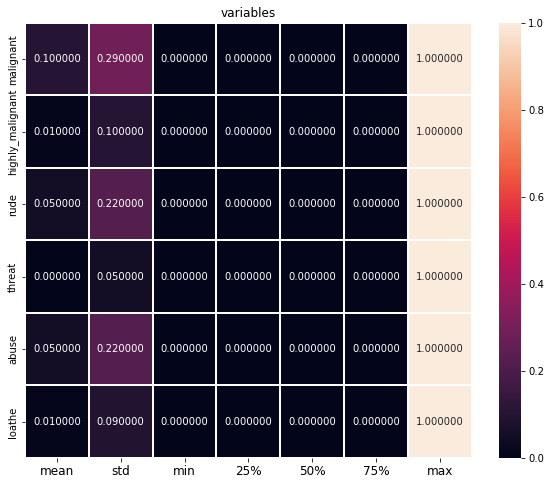

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(round(comments_train.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

#### Observation: 
    - We can see total count is 159571.000000 of each columns which shows there is no null values.
    - Total rows are 159571
    - Total continuous columns are: 6 and categorical column are: 2
    - Std deviation is more than mean
    - All percentile difference is 0
- So, on the basis of the observation we can state that this datset is skewed.

#### We wil not check description of datset as it Works only on continuous data and this dataset contains categorical data.

# Data Cleaning

In [25]:
#dropping column "id" as this column contains unique value which is not relevant for prediction
comments_train.drop("id",axis=1,inplace=True)

In [26]:
#dropping column "id" as this column contains unique value which is not relevant for prediction
comments_test.drop("id",axis=1,inplace=True)

## Handling column "comment_text" of both dataset

# Data Visualization
## Univariate Analysis
### Using Countplot 

0    144277
1     15294
Name: malignant, dtype: int64


<AxesSubplot:xlabel='malignant', ylabel='count'>

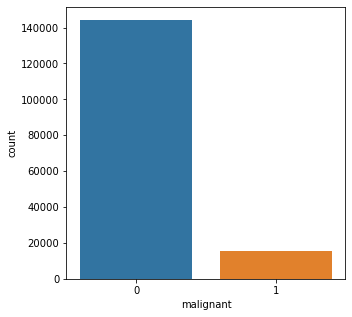

In [27]:
print(comments_train['malignant'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('malignant', data=comments_train)

0    157976
1      1595
Name: highly_malignant, dtype: int64


<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

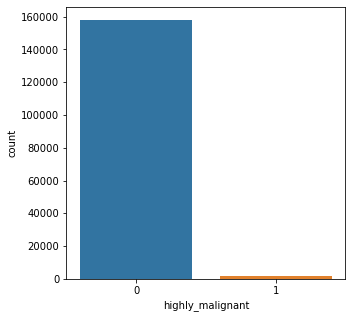

In [28]:
print(comments_train['highly_malignant'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('highly_malignant', data=comments_train)

0    151122
1      8449
Name: rude, dtype: int64


<AxesSubplot:xlabel='rude', ylabel='count'>

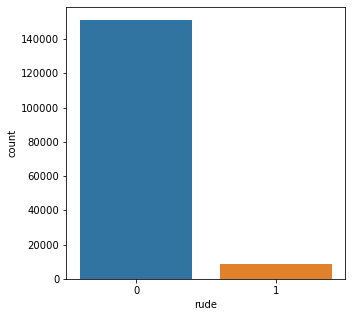

In [29]:
print(comments_train['rude'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('rude', data=comments_train)

0    159093
1       478
Name: threat, dtype: int64


<AxesSubplot:xlabel='threat', ylabel='count'>

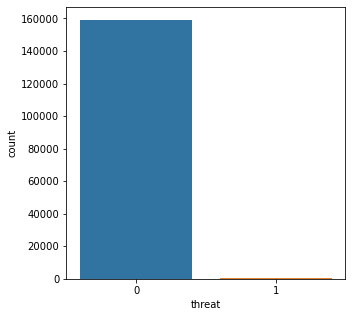

In [30]:
print(comments_train['threat'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('threat', data=comments_train)

0    151694
1      7877
Name: abuse, dtype: int64


<AxesSubplot:xlabel='abuse', ylabel='count'>

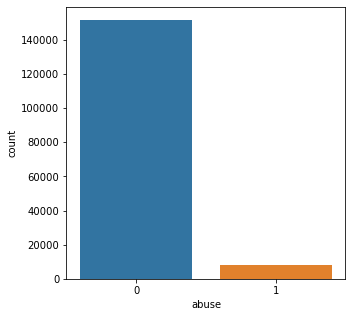

In [31]:
print(comments_train['abuse'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('abuse', data=comments_train)

0    158166
1      1405
Name: loathe, dtype: int64


<AxesSubplot:xlabel='loathe', ylabel='count'>

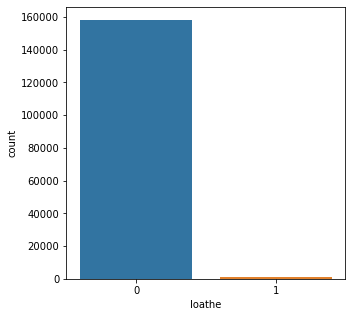

In [32]:
print(comments_train['loathe'].value_counts())
plt.figure(figsize=(5,5))
sns.countplot('loathe', data=comments_train)

## Bivariate Analysis
### Using Barplot

<AxesSubplot:xlabel='malignant', ylabel='highly_malignant'>

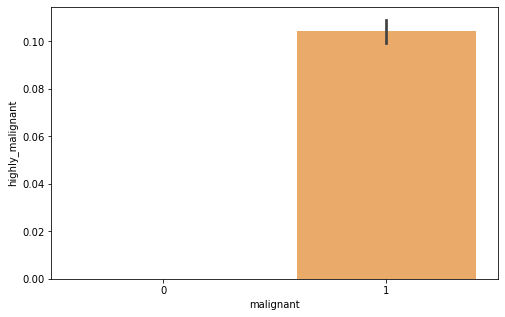

In [33]:
plt.figure(figsize=(8,5))
sns.barplot(x='malignant',y='highly_malignant',data= comments_train, palette='spring')

<AxesSubplot:xlabel='rude', ylabel='threat'>

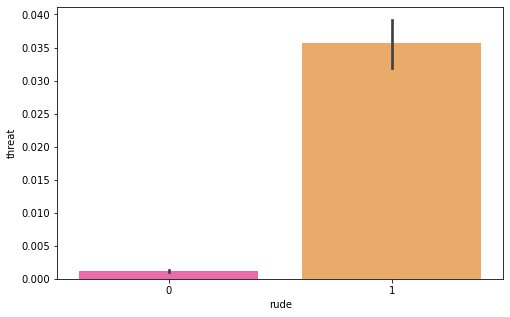

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x='rude',y='threat',data= comments_train, palette='spring')

<AxesSubplot:xlabel='abuse', ylabel='loathe'>

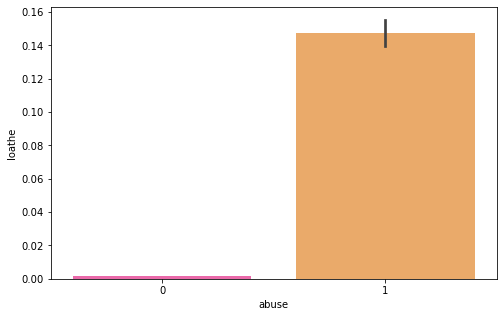

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(x='abuse',y='loathe',data= comments_train, palette='spring')

## Multivariate Analysis

### Using Pie-plot

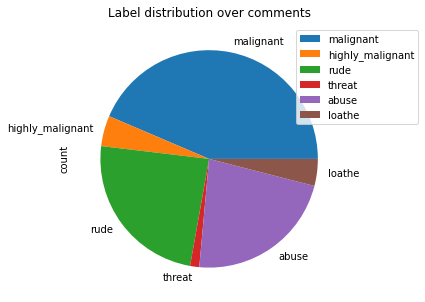

In [36]:
#checking how which comment fall under which category
cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = comments_train[cols].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

### Using Pairplot

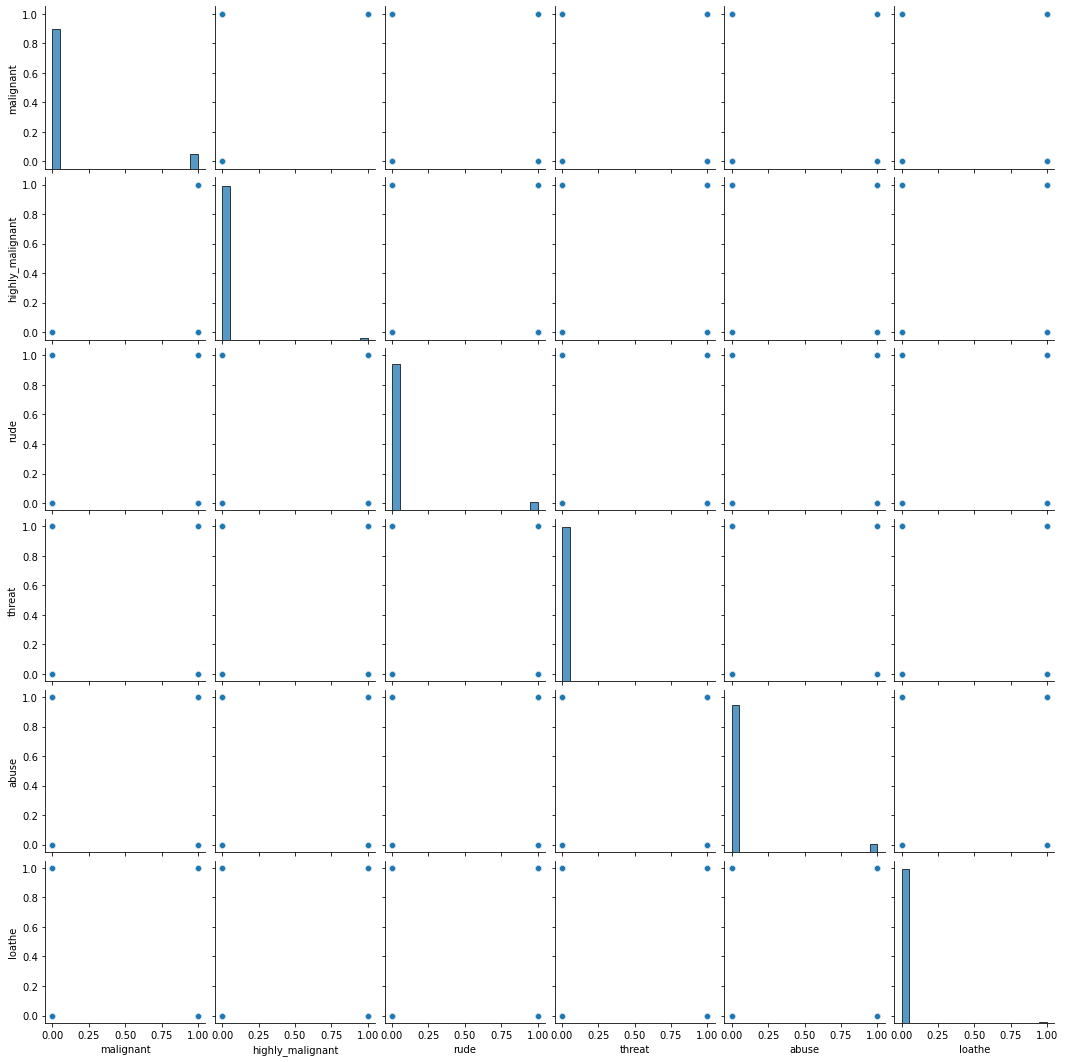

In [37]:
sns.pairplot(comments_train)

##### We can observe relationship between all the continuous column.

# Checking Correlation

In [38]:
comments_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


## Checking correlation with heatmap

<AxesSubplot:>

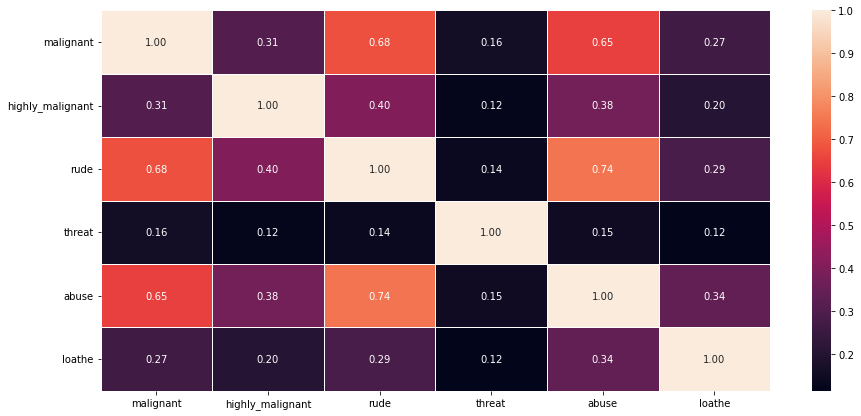

In [39]:
plt.figure(figsize=(15,7))
sns.heatmap(comments_train.corr(),annot=True, linewidth=0.5, linecolor='white', fmt='.2f')

#### Outcome of Correlation:
gender has -1 percent correlation with the target column which can be considered as good correlation and negatively correlated.
SeniorCitizen has 15 percent correlation with the target column which can be considered as good correlation and positively correlated.
Partner has -15 percent correlation with the target column which can be considered as good correlation and negatively correlated.
Dependents has -16 percent correlation with the target column which can be considered as good correlation and negatively correlated.
tenure has -35 percent correlation with the target column which can be considered as good correlation and negatively correlated.
PhoneService has 1 percent correlation with the target column which can be considered as good correlation and positively correlated.
MultipleLines has 4 percent correlation with the target column which can be considered as good correlation and positively correlated.
InternetService has -5 percent correlation with the target column which can be considered as good correlation and negatively correlated.
OnlineSecurity has -29 percent correlation with the target column which can be considered as good correlation and negatively correlated.
OnlineBackup has -20 percent correlation with the target column which can be considered as good correlation and negatively correlated.
DeviceProtection has -18 percent correlation with the target column which can be considered as good correlation and negatively correlated.
TechSupport has -28 percent correlation with the target column which can be considered as good correlation and negatively correlated.
StreamingTV has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.
StreamingMovies has -4 percent correlation with the target column which can be considered as good correlation and negatively correlated.
Contract has -40 percent correlation with the target column which can be considered as weak correlation and negatively correlated.
PaperlessBilling has 19 percent correlation with the target column which can be considered as good correlation and positively correlated.
PaymentMethod has 11 percent correlation with the target column which can be considered as good correlation and positively correlated.
MonthlyCharges has 19 percent correlation with the target column which can be considered as strong correlation and positively correlated.
TotalCharges has -20 percent correlation with the target column which can be considered as good correlation and negatively correlated.

Max correlation is with MonthlyCharges
Min correlation is with Contract

# Checking Outliers

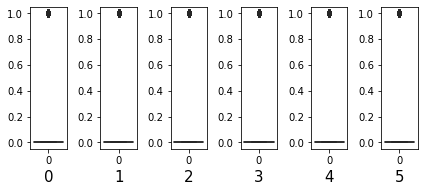

In [40]:
collist=["malignant", "highly_malignant", "rude", "threat", "abuse", "loathe"]
ncol=6
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for column in range(0,len(collist)):
    plt.subplot(nrows,ncol,column+1)
    sns.boxplot(data=comments_train[collist[column]],color='green',orient='v')
    plt.xlabel(column,fontsize = 15)
    plt.tight_layout()

#### Observation:
    - We can see Outliers are not present. So, we will proceed further.

In [41]:
cmnt_train=comments_train.copy()

# Checking Skewness

In [42]:
cmnt_train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

#### Skewness is not present in our dataset

# Data preprocessing

### "cmnt_train" Dataset

In [43]:
cmnt_train['length'] = cmnt_train['comment_text'].str.len()

In [44]:
# Convert all messages to lower case
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.lower()

In [45]:
# Replace email addresses with 'email'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [46]:
# Replace URLs with 'webaddress'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

In [47]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'£|\$', 'dollers')

In [48]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

In [49]:
# Replace numbers with 'numbr'
cmnt_train['comment_text'] = cmnt_train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [50]:
cmnt_train['comment_text'] = cmnt_train['comment_text'].apply(lambda x: ' '.join
                                                              (term for term in x.split() if term not in string.punctuation))

In [51]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

In [52]:
cmnt_train['comment_text'] = cmnt_train['comment_text'].apply(lambda x: ' '.join
                                                              (term for term in x.split() if term not in stop_words))

In [53]:
lem=WordNetLemmatizer()

cmnt_train['comment_text'] = cmnt_train['comment_text'].apply(lambda x: ' '.join
                                                              (lem.lemmatize(t) for t in x.split()))

In [54]:
cmnt_train['clean_length'] = cmnt_train.comment_text.str.len()
cmnt_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [55]:
# Total length removal
print ('Origian Length', cmnt_train.length.sum())
print ('Clean Length', cmnt_train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


In [56]:
# making one target column 
cmnt_train["label"]=cmnt_train["malignant"] | cmnt_train["highly_malignant"] | cmnt_train["rude"] | cmnt_train["threat"] | cmnt_train["abuse"] | cmnt_train["loathe"]

In [57]:
cmnt_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length,label
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180,0
1,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111,0
2,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149,0
3,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397,0
4,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47,0
...,...,...,...,...,...,...,...,...,...,...
159566,""":::::and second time asking, view completely ...",0,0,0,0,0,0,295,211,0
159567,ashamed horrible thing put talk page. numbr.numbr,0,0,0,0,0,0,99,49,0
159568,"spitzer umm, there actual article prostitution...",0,0,0,0,0,0,81,68,0
159569,look like actually put speedy first version de...,0,0,0,0,0,0,116,60,0


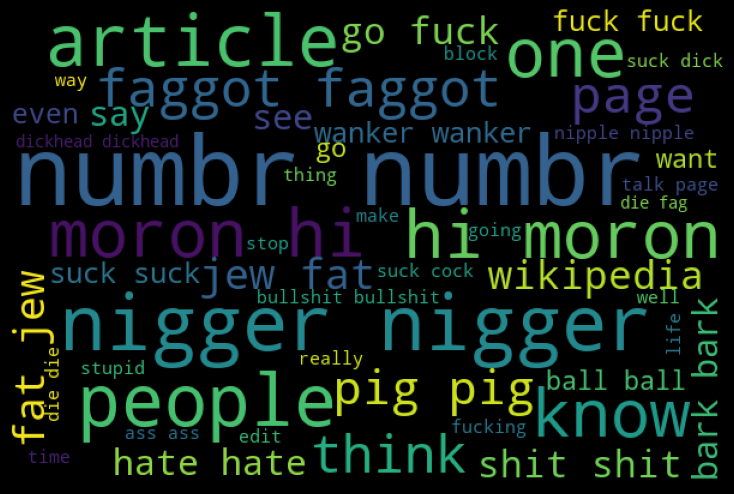

In [58]:
# seeing the word which are offensive
from wordcloud import WordCloud

malignant=cmnt_train["comment_text"][cmnt_train["label"]==1]

malign_cloud= WordCloud(width=600,height=400,background_color="black",max_words=50).generate(" ".join(malignant))

plt.figure(figsize=(10,8),facecolor="k")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

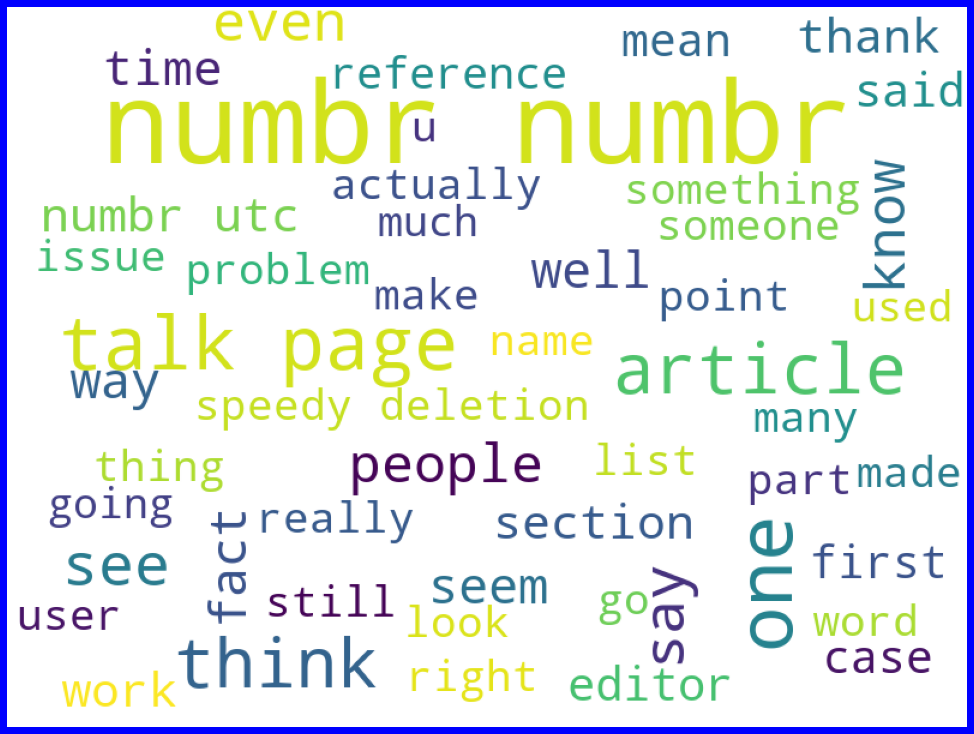

In [59]:
# seeing the word which are not offensive
from wordcloud import WordCloud

non_malignant=cmnt_train["comment_text"][cmnt_train["label"]==0]

malign_cloud= WordCloud(width=800,height=600,background_color="white",max_words=50).generate(" ".join(non_malignant))

plt.figure(figsize=(15,10),facecolor="b")
plt.imshow(malign_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

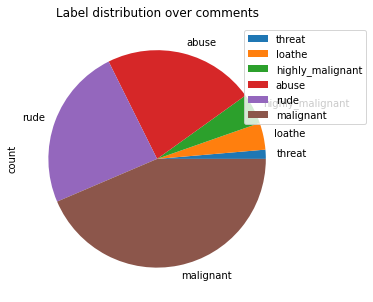

In [61]:
#checking how which comment fall under which category
cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = cmnt_train[cols].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

In [64]:
target_data = cmnt_train[cols]
cmnt_train['bad'] =cmnt_train[cols].sum(axis =1)
print(cmnt_train['bad'].value_counts())
cmnt_train['bad'] = cmnt_train['bad'] > 0 
cmnt_train['bad'] = cmnt_train['bad'].astype(int)
print(cmnt_train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


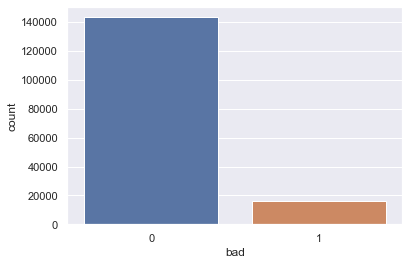

In [65]:
sns.set()
sns.countplot(x="bad" , data = cmnt_train)
plt.show()

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
#Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(cmnt_train['comment_text'])
x = features
y=cmnt_train['bad']

In [68]:
cmnt_test= comments_test.copy()

### "cmnt_test" Dataset

In [69]:
cmnt_test["comment_text"] = cmnt_test["comment_text"].str.lower()

In [70]:
cmnt_test["length"] = cmnt_test["comment_text"].str.len() 

In [71]:
#replacing with email address
cmnt_test["comment_text"]= cmnt_test["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',"emailaddress")

In [72]:
#replacing with web address                                                   
cmnt_test["comment_text"]= cmnt_test["comment_text"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$',"webaddress")

In [73]:
#replacing with number
cmnt_test["comment_text"]= cmnt_test["comment_text"].str.replace(r'\d+(\.\d+)?',"number")

In [74]:
#remove  punctation
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace(r'[^\w\d\s]'," ")

In [75]:
# replace extra space
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace(r'^\s+'," ")

In [76]:
#replacing leading and trailing white space
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace(r'^\s+|\s+?$', "")

In [77]:
#replacing with\n
cmnt_test["comment_text"]=cmnt_test["comment_text"].str.replace("\n"," ")

In [78]:
# remove stopwords
stop_words = set(stopwords.words('english') + ["m","ur","aww","d","dont","cant","doin","ja","u"])

In [79]:
cmnt_test["comment_text"]= cmnt_test["comment_text"].apply(lambda x: ' '.join
                                                           (term for term in x.split() if term not in stop_words ))

In [80]:
#Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item.
#This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, 
#such as neighboring sentences or even an entire document.
lem=WordNetLemmatizer()
cmnt_test['comment_text'] = cmnt_test['comment_text'].apply(lambda x: ' '.join
                                                            (lem.lemmatize(word) for word in x.split()))

In [81]:
cmnt_test["clean_cmnt_test"] = cmnt_test["comment_text"].str.len() 
cmnt_test.head()

,comment_text,length,clean_cmnt_test
0,yo bitch rule succesful ever whats hating sad ...,367,221
1,rfc title fine imo,50,18
2,source zawe ashton lapland,54,26
3,look back source information updated correct f...,205,109
4,anonymously edit article,41,24


In [82]:
print('original length',cmnt_test.length.sum())
print('cleaned length',cmnt_test.clean_cmnt_test.sum())

original length 55886104
cleaned length 35617170


In [83]:
cmnt_train.shape

(159571, 11)

In [84]:
cmnt_test.shape

(153164, 3)

# Creating Model
We are using Classification Algorithm

In [85]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=56)

In [86]:
x.shape, y.shape

((159571, 10000), (159571,))

In [87]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((111699, 10000), (111699,), (47872, 10000), (47872,))

We can see the x.shape value is divided into x_train.shape and x_test.shape and like this y.shape is also divided. We will understand this by Classification problem.

## 1. Logistic Regression 

In [88]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)

print("accuracy_score: ", accuracy_score(y_test, pred_lr))
print("confusion_matrix: \n", confusion_matrix(y_test, pred_lr))
print("classification_report: \n", classification_report(y_test,pred_lr))

accuracy_score:  0.9553392379679144
confusion_matrix: 
 [[42729   221]
 [ 1917  3005]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



### Confusion Matrix for Logistic Regression

Text(0.5, 1.0, 'Logistic regressor prediction Confusion_matrix')

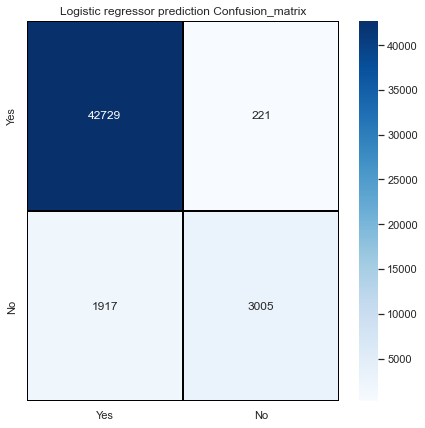

In [89]:
cm = confusion_matrix(y_test,pred_lr)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Logistic regressor prediction Confusion_matrix")

## 2. AdaBoost Classifier

In [92]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc = abc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_abc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_abc))
print("classification_report: \n",classification_report(y_test,pred_abc))

accuracy_score:  0.9454169451871658
confusion_matrix: 
 [[42587   363]
 [ 2250  2672]]
classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     42950
           1       0.88      0.54      0.67      4922

    accuracy                           0.95     47872
   macro avg       0.92      0.77      0.82     47872
weighted avg       0.94      0.95      0.94     47872



### Confusion Matrix for AdaBoost Classifier

Text(0.5, 1.0, 'AdaBoost Classifier prediction Confusion_matrix')

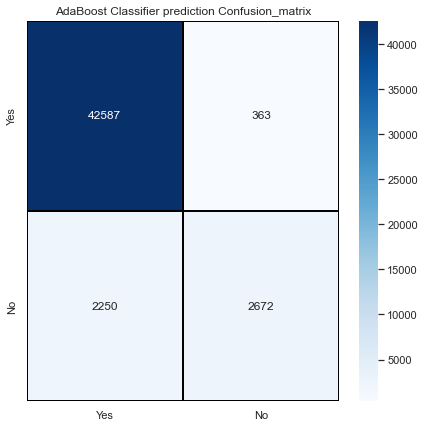

In [93]:
cm = confusion_matrix(y_test,pred_abc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("AdaBoost Classifier prediction Confusion_matrix")

## 3. Decision Tree Classifier

In [111]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc = dtc.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_dtc))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_dtc))
print("classification_report: \n",classification_report(y_test,pred_dtc))

accuracy_score:  0.9394426804812834
confusion_matrix: 
 [[41591  1359]
 [ 1540  3382]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.71      0.69      0.70      4922

    accuracy                           0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



### Confusion Matrix for Decision Tree Classifier

Text(0.5, 1.0, 'DTC prediction Confusion_matrix')

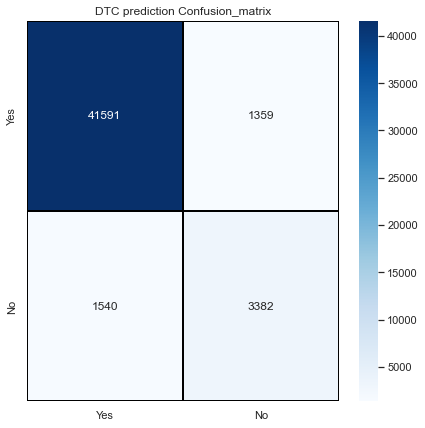

In [112]:
cm = confusion_matrix(y_test,pred_dtc)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("DTC prediction Confusion_matrix")

## 5. KNN Classifier

In [95]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_knn))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_knn))
print("classification_report: \n",classification_report(y_test,pred_knn))

accuracy_score:  0.9184909759358288
confusion_matrix: 
 [[42615   335]
 [ 3567  1355]]
classification_report: 
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     42950
           1       0.80      0.28      0.41      4922

    accuracy                           0.92     47872
   macro avg       0.86      0.63      0.68     47872
weighted avg       0.91      0.92      0.90     47872



### Confusion Matrix for KNN

Text(0.5, 1.0, 'KNN prediction Confusion_matrix')

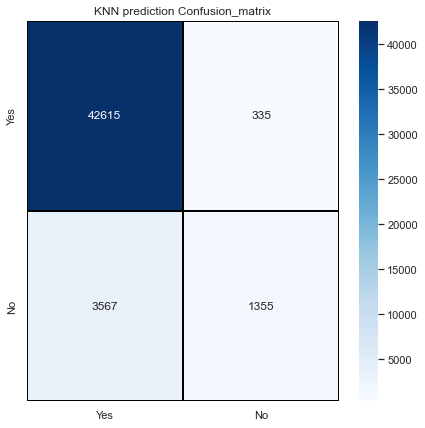

In [96]:
cm = confusion_matrix(y_test,pred_knn)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("KNN prediction Confusion_matrix")

## 6. Gradient Boosting Classifier

In [97]:
gb = GradientBoostingClassifier(n_estimators =100,learning_rate=0.1, max_depth=4)
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_gb))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_gb))
print("classification_report: \n",classification_report(y_test,pred_gb))

accuracy_score:  0.9417822526737968
confusion_matrix: 
 [[42794   156]
 [ 2631  2291]]
classification_report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     42950
           1       0.94      0.47      0.62      4922

    accuracy                           0.94     47872
   macro avg       0.94      0.73      0.80     47872
weighted avg       0.94      0.94      0.93     47872



### Confusion Matrix for Gradient Boosting classifier

Text(0.5, 1.0, 'Gradient Boosting classifier prediction Confusion_matrix')

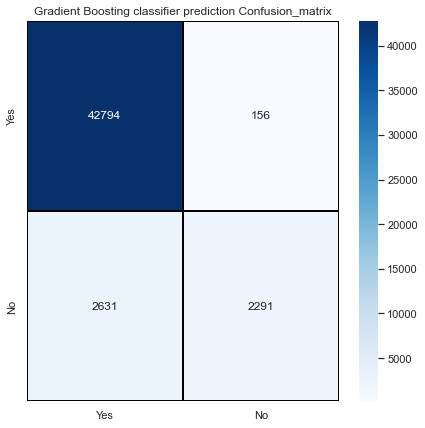

In [98]:
cm = confusion_matrix(y_test,pred_gb)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("Gradient Boosting classifier prediction Confusion_matrix")

## 7. XGB Classifier

In [99]:
XGBC= XGBClassifier()
XGBC.fit(x_train,y_train)
pred_XGBC = XGBC.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_XGBC))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_XGBC))
print("classification_report: \n",classification_report(y_test,pred_XGBC))

accuracy_score:  0.9526236631016043
confusion_matrix: 
 [[42689   261]
 [ 2007  2915]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.92      0.59      0.72      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.79      0.85     47872
weighted avg       0.95      0.95      0.95     47872



### Confusion Matrix for XGB Classifier

Text(0.5, 1.0, 'XGB Classifier prediction Confusion_matrix')

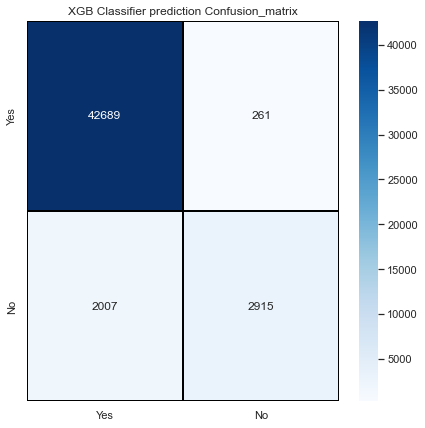

In [100]:
cm = confusion_matrix(y_test,pred_XGBC)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("XGB Classifier prediction Confusion_matrix")

## 8. MultinomialNB

In [101]:
MNB= MultinomialNB()
MNB.fit(x_train,y_train)
pred_MNB = MNB.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test, pred_MNB))
print("confusion_matrix: \n",confusion_matrix(y_test, pred_MNB))
print("classification_report: \n",classification_report(y_test,pred_MNB))

accuracy_score:  0.946524064171123
confusion_matrix: 
 [[42782   168]
 [ 2392  2530]]
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     42950
           1       0.94      0.51      0.66      4922

    accuracy                           0.95     47872
   macro avg       0.94      0.76      0.82     47872
weighted avg       0.95      0.95      0.94     47872



### Confusion Matrix for XGB Classifier

Text(0.5, 1.0, 'MultinomialNB prediction Confusion_matrix')

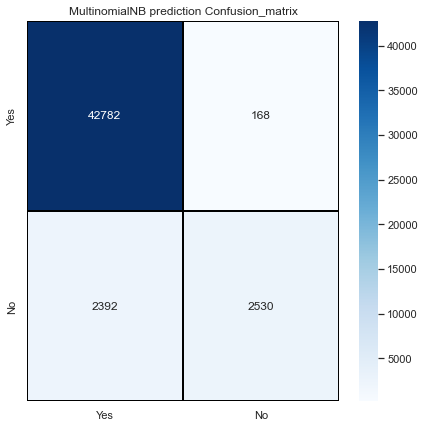

In [102]:
cm = confusion_matrix(y_test,pred_MNB)
x_axis_labels = ["Yes","No"]
y_axis_labels = ["Yes","No"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", 
xticklabels=x_axis_labels,
yticklabels=y_axis_labels)
plt.title("MultinomialNB prediction Confusion_matrix")

## Cross Validation Score for all the model

In [103]:
#CV Score for Logistic Regression
print('CV score for Logistic Regression: ',cross_val_score(lr,x,y,cv=5).mean())

CV score for Logistic Regression:  0.9560885051692514


In [106]:
#CV Score for AdaBoost Classifier
print('CV score for AdaBoost Classifier: ',cross_val_score(abc,x,y,cv=5).mean())

CV score for AdaBoost Classifier:  0.9456793494964841


In [113]:
#CV Score for Decision Tree Classifier
print('CV score for Decision Tree Classifier: ',cross_val_score(dtc,x,y,cv=5).mean())

CV score for Decision Tree Classifier:  0.9406533809809696


In [107]:
#CV Score for KNN Classifier
print('CV score for KNN Classifier: ',cross_val_score(knn,x,y,cv=5).mean())

CV score for KNN Classifier:  0.9149657437011193


In [108]:
#CV Score for Gradient Boosting Classifier
print('CV score for Gradient Boosting Classifier: ',cross_val_score(gb,x,y,cv=5).mean())

CV score for Gradient Boosting Classifier:  0.9428404884657361


In [109]:
#CV Score for XGB Classifier
print('CV score for XGB Classifier: ',cross_val_score(XGBC,x,y,cv=5).mean())

CV score for XGB Classifier:  0.95377606084172


In [110]:
#CV Score for MultinomialNB Classifier
print('CV score for MultinomialNB: ',cross_val_score(MNB,x,y,cv=5).mean())

CV score for MultinomialNB:  0.9478727365868151


## ROC & AUC Curve for all model

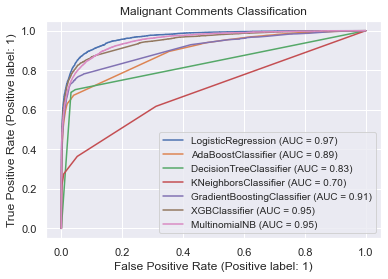

In [115]:
#Lets plot roc curve and check auc and performance of all algorithms
disp = plot_roc_curve(lr, x_test, y_test)
plot_roc_curve(abc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(XGBC, x_test, y_test, ax = disp.ax_)
plot_roc_curve(MNB, x_test, y_test, ax = disp.ax_)
plt.title("Malignant Comments Classification")
plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

##### From the observation of accuracy and cross validation score and their difference we can predict that Logistic Regression is the best model.

# Hyper parameter tuning for best model
## The Logistic Regression with GridsearchCV

In [151]:
solver_options = ['newton-cg', 'lbfgs', 'liblinear', 'sag']
multi_class_options = ['ovr', 'multinomial']
class_weight_options = ['None', 'balanced']

In [152]:
param_grid = dict(solver = solver_options, 
                  multi_class = multi_class_options, 
                  class_weight = class_weight_options)

In [153]:
clf = GridSearchCV(logModel, param_grid, cv=5, scoring = 'accuracy', )

In [154]:
clf.fit(x,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'class_weight': ['None', 'balanced'],
                         'multi_class': ['ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag']},
             scoring='accuracy')

In [155]:
clf.best_estimator_

LogisticRegression(class_weight='None', multi_class='ovr')

In [158]:
print (f'Accuracy - : {clf.score(x,y)}')

Accuracy - : 0.9604690075264303


In [161]:
malignant= LogisticRegression(class_weight='None',multi_class='ovr')
malignant.fit(x_train,y_train)

LogisticRegression(class_weight='None', multi_class='ovr')

In [164]:
pred = malignant.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred))
print("Cross_validation_Score :", cross_val_score(lr,x,y,cv=5).mean())
print("confusion_matrix: \n",confusion_matrix(y_test,pred))
print("classification_report: \n",classification_report(y_test,pred))

accuracy score:  0.9553183489304813
Cross_validation_Score : 0.9560885051692514
confusion_matrix: 
 [[42729   221]
 [ 1918  3004]]
classification_report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



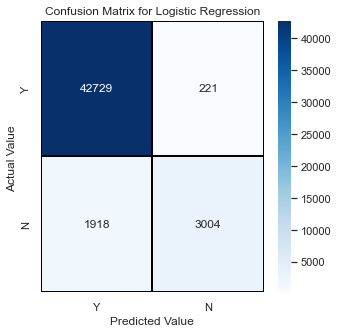

In [165]:
cm = confusion_matrix(y_test, pred)

x_axis_labels = ["Y","N"]
y_axis_labels = ["Y","N"]

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value ")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#### Here the final model gives 95% accuracy after tuning.

### ROC-AUC Curve

In [166]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)

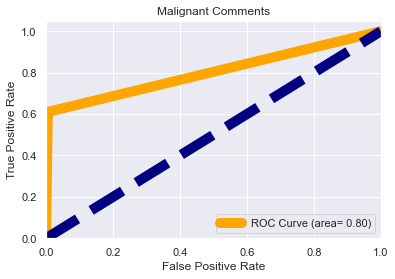

In [167]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Malignant Comments")
plt.legend(loc="lower right")
plt.show()

#### This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.80.

## The Logistic Regression with RandomizedSearchCV

In [119]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}

In [120]:
rand_search = RandomizedSearchCV(lr,param_distributions=param,cv=2)

In [121]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [122]:
rand_search.best_params_

{'warm_start': True, 'random_state': 100, 'dual': False}

In [134]:
lr= LogisticRegression(warm_start=True,random_state=100,dual=False)
lr.fit(x_train,y_train)

y_pred1= lr.predict(x_test)

In [135]:
print(" Accuracy score :",accuracy_score(y_test,y_pred1),
      "\n","="*80,
      "\n Cross_validation_Score :", cross_val_score(lr,x,y,cv=5).mean(),
      "\n","="*80,
      "\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,
      "\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))

 Accuracy score : 0.9553183489304813 
 Cross_validation_Score : 0.9560885051692514 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872
 Confusion matrix :
 [[42729   221]
 [ 1918  3004]]


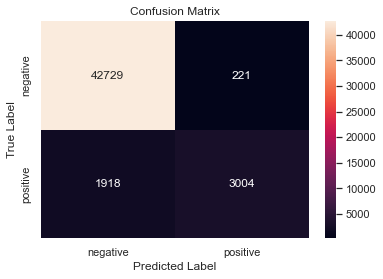

In [136]:
conf_mat = confusion_matrix(y_test, y_pred1)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### Here the final model gives 95% accuracy after tuning.

### ROC-AUC Curve

In [138]:
fpr, tpr, threshold = roc_curve(y_test,y_pred1)
auc = roc_auc_score(y_test,y_pred1)

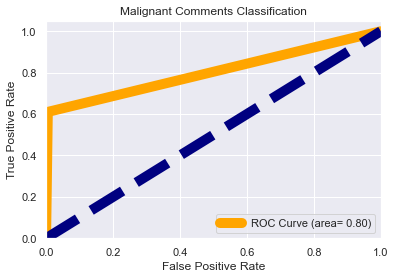

In [139]:
plt.figure()
plt.plot(fpr,tpr,color="orange",lw=10,label="ROC Curve (area= %0.2f)" % auc)
plt.plot([0,1],[0,1],color="navy",lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Malignant Comments Classification")
plt.legend(loc="lower right")
plt.show()

##### This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate. So the best model has the area under curve as 0.80.

#### We can see both method of hypertunning is giving same result. So, we can proceed with any one and here proceeding with The Logistic Regression with RandomizedSearchCV. 

### Saving the Model

In [140]:
filename='Malignant_Comments_Classification.pickle'
pickle.dump(lr,open(filename,'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

### Checking predicted and original values

In [141]:
a =np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))
Malignant_Comments_Classification=pd.DataFrame({'Orginal':a,'Predicted':predicted}, index=range(len(a)))
Malignant_Comments_Classification

,Orginal,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
47867,0,0
47868,0,0
47869,0,0
47870,0,0


In [145]:
# It will give you top 15 features or words  which makes a comment toxic
import eli5
eli5.show_weights(lr,vec = tf_vec, top = 15)

Weight?,Feature
+16.070,fuck
+13.068,fucking
+11.704,idiot
+11.665,shit
+10.679,stupid
+9.408,asshole
+8.826,suck
+8.753,bullshit
+8.701,bitch
+7.539,dick


### Verifying Model on Testing Data

In [146]:
#test data (comments) converted to vectors
testing_data = tf_vec.fit_transform(cmnt_test["comment_text"])

In [147]:
prediction=lr.predict(testing_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [148]:
cmnt_test['Prediction'] = prediction
cmnt_test.head()

,comment_text,length,clean_cmnt_test,Prediction
0,yo bitch rule succesful ever whats hating sad ...,367,221,0
1,rfc title fine imo,50,18,0
2,source zawe ashton lapland,54,26,0
3,look back source information updated correct f...,205,109,0
4,anonymously edit article,41,24,0


### Saving Testing Data

In [149]:
cmnt_test.to_csv('Malignant_Test.csv',index=False)